In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
coordinates = list(lat_lngs)
coordinates

[(-65.04603676415826, -23.128786770215726),
 (7.557619758197234, -5.348323859775007),
 (26.32530125297309, 52.43479756567672),
 (20.56679116318149, 115.93869314393015),
 (38.05072535394578, -4.558400461564872),
 (-56.4977571619235, 111.1631535737094),
 (53.97500827712258, -1.0290361782174955),
 (-88.82095659985534, -17.827952877508352),
 (-88.05997572025865, -65.83532794009892),
 (-68.68715448384646, 161.02968379473663),
 (71.68001011200852, 83.24307570665627),
 (71.05442997579783, 118.10343143510005),
 (86.71308935897602, 73.6821746324037),
 (-68.5996759217864, -132.82174079303016),
 (-4.8382186493781205, 120.8370808418947),
 (-88.0429379981671, -44.941037709443776),
 (53.45106924820516, -151.85487993428166),
 (33.81872954842946, -5.825677717368649),
 (83.71109355459265, -83.23895501902773),
 (71.94856801212367, -50.055769225755796),
 (-33.03264876719985, 108.72292230897125),
 (-11.508496346953308, -123.1191970015497),
 (34.71979874353815, -126.78802641438963),
 (69.65803679532345, -8

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=666fc481726ecf78efed4da2ec6af0ff


In [9]:
# declare an empty list to hold the weather data
city_data = []

# add print statement referencing the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
        
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        # Generally not best practice to add a pass statement 
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | sakassou
Processing Record 3 of Set 1 | khor
Processing Record 4 of Set 1 | jieshi
Processing Record 5 of Set 1 | montoro
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | york
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | karaul
City not found. Skipping...
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | bone
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | sidi qasim
City not found. Skipping...
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | half moon bay
Processing Record 22 of Set 1 | thompson
Processing Record 23 of Se

Processing Record 36 of Set 4 | narsaq
Processing Record 37 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 38 of Set 4 | sept-iles
Processing Record 39 of Set 4 | cape town
Processing Record 40 of Set 4 | kuche
City not found. Skipping...
Processing Record 41 of Set 4 | havelock
Processing Record 42 of Set 4 | north platte
Processing Record 43 of Set 4 | yellowknife
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | cap malheureux
Processing Record 47 of Set 4 | berlevag
Processing Record 48 of Set 4 | victoria
Processing Record 49 of Set 4 | kalevala
Processing Record 50 of Set 4 | luderitz
Processing Record 1 of Set 5 | utiroa
City not found. Skipping...
Processing Record 2 of Set 5 | karaton
Processing Record 3 of Set 5 | alta floresta
Processing Record 4 of Set 5 | nyagan
Processing Record 5 of Set 5 | bengkulu
Processing Record 6 of Set 5 | pakxan
Processing Record 7 of Set 5 | ahuimanu
Processing Re

Processing Record 24 of Set 8 | coihaique
Processing Record 25 of Set 8 | corralillo
Processing Record 26 of Set 8 | tekkali
Processing Record 27 of Set 8 | kaniama
Processing Record 28 of Set 8 | shingu
Processing Record 29 of Set 8 | marcona
City not found. Skipping...
Processing Record 30 of Set 8 | huntington
Processing Record 31 of Set 8 | alamogordo
Processing Record 32 of Set 8 | beverly hills
Processing Record 33 of Set 8 | honiara
Processing Record 34 of Set 8 | vanimo
Processing Record 35 of Set 8 | ukiah
Processing Record 36 of Set 8 | saint-augustin
Processing Record 37 of Set 8 | pocoes
Processing Record 38 of Set 8 | sisimiut
Processing Record 39 of Set 8 | wheeling
Processing Record 40 of Set 8 | ulladulla
Processing Record 41 of Set 8 | marawi
Processing Record 42 of Set 8 | keizer
Processing Record 43 of Set 8 | ustye
Processing Record 44 of Set 8 | cienfuegos
Processing Record 45 of Set 8 | naze
Processing Record 46 of Set 8 | churapcha
Processing Record 47 of Set 8 |

Processing Record 15 of Set 12 | baykit
Processing Record 16 of Set 12 | balkanabat
Processing Record 17 of Set 12 | cermik
Processing Record 18 of Set 12 | chumikan
Processing Record 19 of Set 12 | visalia
Processing Record 20 of Set 12 | namatanai
Processing Record 21 of Set 12 | rabo de peixe
Processing Record 22 of Set 12 | barbar
City not found. Skipping...
Processing Record 23 of Set 12 | ternate
Processing Record 24 of Set 12 | quesnel
Processing Record 25 of Set 12 | zheshart
Processing Record 26 of Set 12 | enthavi
Processing Record 27 of Set 12 | ichhawar
Processing Record 28 of Set 12 | aswan
Processing Record 29 of Set 12 | libertador general san martin
Processing Record 30 of Set 12 | saldanha
Processing Record 31 of Set 12 | nalut
Processing Record 32 of Set 12 | waipawa
Processing Record 33 of Set 12 | puerto lleras
Processing Record 34 of Set 12 | muhos
Processing Record 35 of Set 12 | kambove
Processing Record 36 of Set 12 | russell
Processing Record 37 of Set 12 | hon

In [10]:
len(city_data)

559

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,62.60,94,76,5.53,UY,2022-04-08 08:57:31
1,Sakassou,7.4546,-5.2926,73.24,72,98,4.34,CI,2022-04-08 08:57:32
2,Khor,47.8861,134.9464,32.85,94,100,8.41,RU,2022-04-08 08:57:32
3,Jieshi,22.8134,115.8257,73.51,55,0,21.12,CN,2022-04-08 08:57:32
4,Montoro,38.0241,-4.3834,60.98,63,89,3.89,ES,2022-04-08 08:57:33
5,Albany,42.6001,-73.9662,44.17,95,100,4.81,US,2022-04-08 08:57:33
6,York,40.1254,-77.0000,44.11,89,34,5.73,US,2022-04-08 08:57:34
7,Ushuaia,-54.8000,-68.3000,33.46,93,0,3.44,AR,2022-04-08 08:57:34
8,Bluff,-46.6000,168.3333,53.83,61,46,18.05,NZ,2022-04-08 08:57:35
9,Saskylakh,71.9167,114.0833,6.91,96,92,4.00,RU,2022-04-08 08:57:35


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-04-08 08:57:31,-33.6971,-53.4616,62.60,94,76,5.53
1,Sakassou,CI,2022-04-08 08:57:32,7.4546,-5.2926,73.24,72,98,4.34
2,Khor,RU,2022-04-08 08:57:32,47.8861,134.9464,32.85,94,100,8.41
3,Jieshi,CN,2022-04-08 08:57:32,22.8134,115.8257,73.51,55,0,21.12
4,Montoro,ES,2022-04-08 08:57:33,38.0241,-4.3834,60.98,63,89,3.89
5,Albany,US,2022-04-08 08:57:33,42.6001,-73.9662,44.17,95,100,4.81
6,York,US,2022-04-08 08:57:34,40.1254,-77.0000,44.11,89,34,5.73
7,Ushuaia,AR,2022-04-08 08:57:34,-54.8000,-68.3000,33.46,93,0,3.44
8,Bluff,NZ,2022-04-08 08:57:35,-46.6000,168.3333,53.83,61,46,18.05
9,Saskylakh,RU,2022-04-08 08:57:35,71.9167,114.0833,6.91,96,92,4.00


In [13]:
# Create the output file (CSV).
#from just running the "cties.csv" we can identify where the "default location is"
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

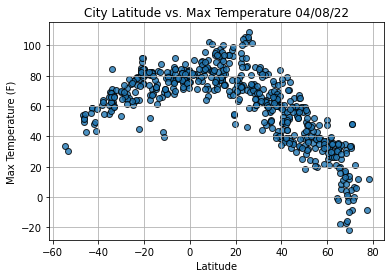

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

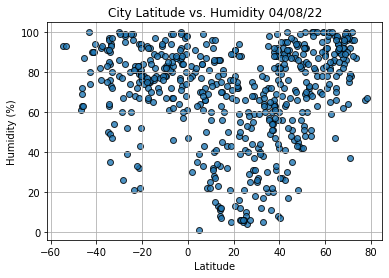

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

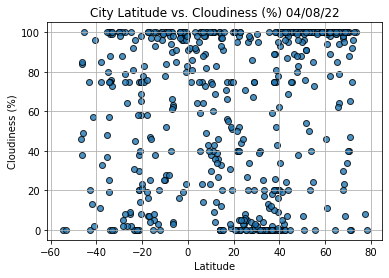

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

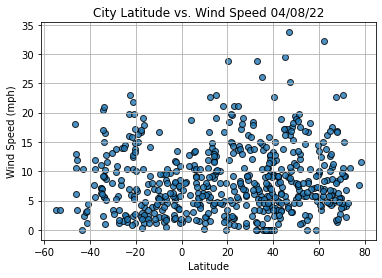

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Kodiak
Country                        US
Date          2022-04-08 08:57:37
Lat                         57.79
Lng                     -152.4072
Max Temp                    30.58
Humidity                       70
Cloudiness                    100
Wind Speed                   7.18
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
554     True
555     True
556    False
557    False
558    False
Name: Lat, Length: 559, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sakassou,CI,2022-04-08 08:57:32,7.4546,-5.2926,73.24,72,98,4.34
2,Khor,RU,2022-04-08 08:57:32,47.8861,134.9464,32.85,94,100,8.41
3,Jieshi,CN,2022-04-08 08:57:32,22.8134,115.8257,73.51,55,0,21.12
4,Montoro,ES,2022-04-08 08:57:33,38.0241,-4.3834,60.98,63,89,3.89
5,Albany,US,2022-04-08 08:57:33,42.6001,-73.9662,44.17,95,100,4.81


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

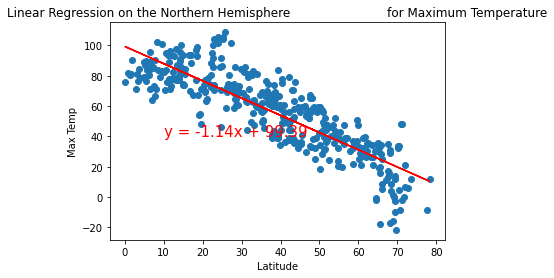

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

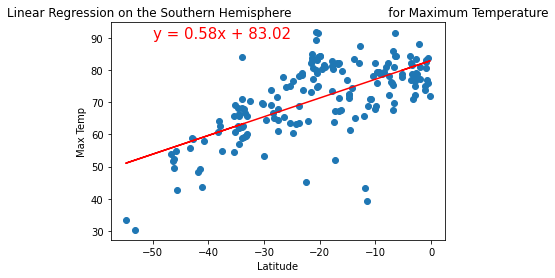

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

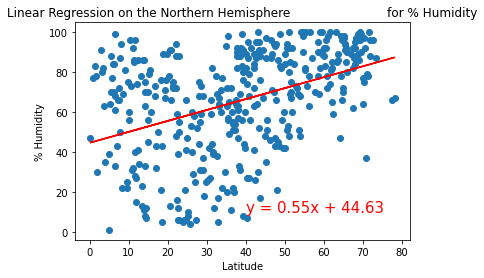

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

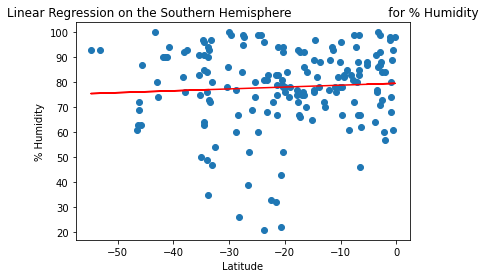

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

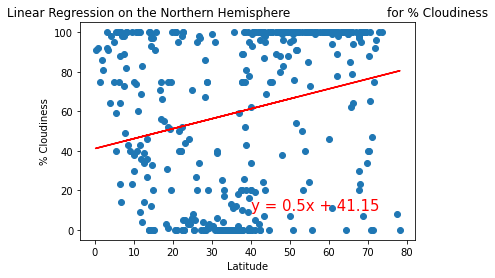

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

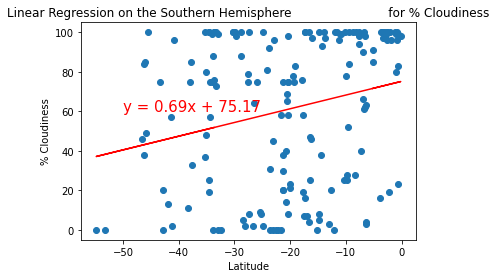

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

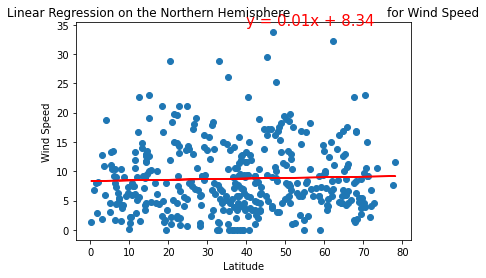

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

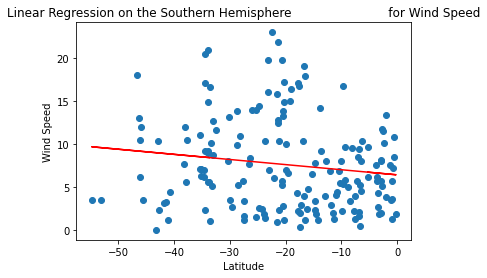

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))